In [1]:
import os

import tensorflow as tf

# Importing matplotlib to plot images.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing SK-learn to calculate precision and recall
import sklearn
import sklearn.metrics


tf.__version__

2024-02-07 14:33:39.586495: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 14:33:40.935670: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.12.1'

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
shape = (28, 28, 1)
# reshape image data
x_train = x_train.reshape(-1, shape[0], shape[1], shape[2])
x_test = x_test.reshape(-1, shape[0], shape[1], shape[2])

# convert to float
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# normalize to a scale between -1 and 1
x_train = x_train / 127.5 -1
x_test = x_test / 127.5 -1

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (one-hot notation)
num_classes = 10
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


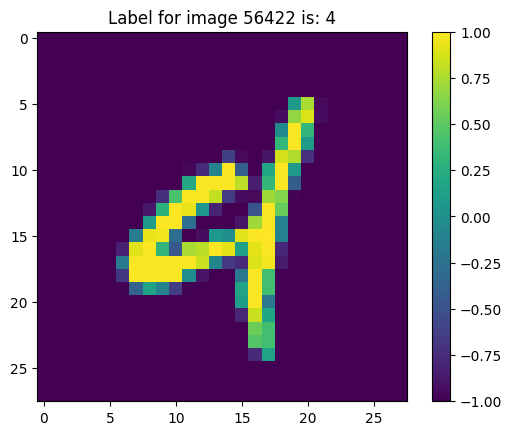

In [4]:
np.random.seed(42)
i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i])
plt.title("Label for image %i is: %s" % (i, y_train[i]))
plt.colorbar()

## GPU and CPU settings
If GPU is not available, comment out the bottom block.

In [5]:
if True:
    # Enter either 0 or 1 below to select the GPU to use
    os.environ["CUDA_VISIBLE_DEVICES"]="0"

    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
x_train[0].shape

(28, 28, 1)

In [7]:
########## HYPER PARAMETERS
batch_size = 128
epochs = 10
optimizer = tf.keras.optimizers.Adam()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=shape, name="input"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_one_hot))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


2024-02-07 14:33:44.418608: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31142 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


Epoch 1/10


2024-02-07 14:33:45.636810: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f580c049120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-07 14:33:45.636875: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-02-07 14:33:45.648914: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-07 14:33:45.686288: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-02-07 14:33:45.839436: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 3s 5ms/step - loss: 1.9574 - accuracy: 0.2594 - val_loss: 1.7340 - val_accuracy: 0.3208
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 1.6162 - accuracy: 0.3769 - val_loss: 1.5228 - val_accuracy: 0.4277
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.4273 - accuracy: 0.4838 - val_loss: 1.3534 - val_accuracy: 0.5138
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3045 - accuracy: 0.5258 - val_loss: 1.2661 - val_accuracy: 0.5285
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2211 - accuracy: 0.6066 - val_loss: 1.2031 - val_accuracy: 0.6116
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1661 - accuracy: 0.6314 - val_loss: 1.1550 - val_accuracy: 0.6314
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1327 - accuracy: 0.6387 - val_loss: 1.1222 - val_accuracy: 0.6368
Epoch 8/10
469/46

# Plot training and test accuracy

In [8]:
# use model for inference to get test accuracy
y_test_pred = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

print ('\n Summary of the precision, recall, F1 score for each class:')
print (sklearn.metrics.classification_report(y_test, y_test_pred))

print ('\n Confusion matrix: ')
print (sklearn.metrics.confusion_matrix(y_test, y_test_pred))

313/313 [==============================] - 1s 1ms/step

 Summary of the precision, recall, F1 score for each class:
              precision    recall  f1-score   support

           0       0.53      0.68      0.60       980
           1       0.78      0.92      0.85      1135
           2       0.39      0.38      0.39      1032
           3       0.67      0.70      0.69      1010
           4       0.74      0.78      0.76       982
           5       0.38      0.22      0.28       892
           6       0.73      0.84      0.78       958
           7       0.84      0.84      0.84      1028
           8       0.53      0.40      0.46       974
           9       0.68      0.63      0.65      1009

    accuracy                           0.65     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.63      0.65      0.63     10000


 Confusion matrix: 
[[ 668    1  179   68    1   38    9    0   16    0]
 [   0 1047    4   26    0   15    0    6   33    4

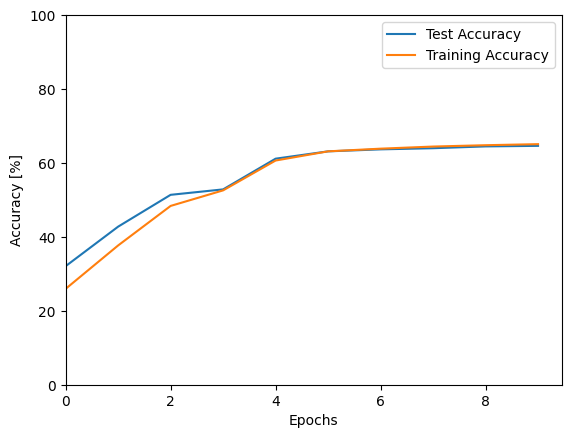

In [9]:
plt.plot(np.array(history.history['val_accuracy'])*100, label="Test Accuracy")
plt.plot(np.array(history.history['accuracy'])*100, label="Training Accuracy")
plt.ylabel("Accuracy [%]")
plt.xlabel("Epochs")
plt.ylim(0,100)
plt.xlim(0,)
plt.legend()

In [10]:
# save model
model.save("myModel.h5")